# **Hotelske rezervacije**

Kolegij: Vizualizacija podataka 2024./2025.
Napravili:
Mia Krstičević, 0036540586
Dominik Leš, 0036518319
Tea Ćetojević Tisaj, 0036541193

Hotelske rezervacije predstavljaju zanimljivo područje za analizu, posebno kada ih promatramo kroz trogodišnje razdoblje od 2015. do 2017. godine. Naša eksploratorna analiza fokusira se na različite aspekte rezervacijskog procesa, uključujući karakteristike gostiju, vremenske trendove, uzorke otkazivanja i specifičnosti hotela. Cilj analize je pružiti pregled podataka i otkriti korisne uvide koji mogu pomoći u boljem razumijevanju industrije.

Ovaj projekt istražuje ključne obrasce, od geografskih trendova do sezonskih promjena, kako bismo dobili cjelovitu sliku. Bez obzira jeste li vlasnik hotela, planirate ulazak u ugostiteljsku industriju ili vas jednostavno zanimaju trendovi u turizmu, ova analiza nudi pregled važnih informacija i potencijalnih prilika. Kroz jasne prikaze i sažetke podataka nastojimo olakšati razumijevanje i potaknuti daljnje istraživanje u ovom dinamičnom sektoru.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Deskriptivna statistika, proučavanje dataseta

In [25]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

file_path = "data/hotel_booking.csv"
df = pd.read_csv(file_path)
print(df.shape)
print("Prvih 5 redova podataka:")
print(df.head(5))

(119390, 36)
Prvih 5 redova podataka:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                    

In [26]:
print(df.columns)

print("\nOsnovne informacije o datasetu:")
print(df.info())

print("\nStatistički opis numeričkih podataka:")
print(df.describe())

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

Osnovne informacije o datasetu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------          

Izbacivanje nedostajućih vrijednosti, ako postoje.

In [27]:
print("\nProvjera nedostajućih vrijednosti:")
print(df.isnull().sum())

# Vidimo da fali 112593 vrijednosti za stupac 'company', pa ćemo taj stupac izbrisati.
# Za stupac country ima 488, a za agent 16340 nedostajućih vrijednosti, pa ćemo ukloniti te retke s Null vrijednostima.
# 16340 je mnogo nedostajućih vrijednosti ali s obzirom da imamo 119390 redaka, mogu se ukloniti.
df = df.drop(columns=['company'])
#print(df.isnull().sum())

df = df.dropna()
df.shape


Provjera nedostajućih vrijednosti:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                

(102894, 35)

Izbacivanje konstantnih i monotonih vrijednosti, ako postoje.

In [28]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("\nKonstantni stupci:", constant_cols)

monotonic_cols = [col for col in df.columns if df[col].is_monotonic_increasing or df[col].is_monotonic_decreasing]
print("\nMonotono:", monotonic_cols)

#uklanjanje stupca index i hotel
df1 = df.copy()
#df1 = df1.drop(columns=['index', 'hotel'])
df1.head(5)


Konstantni stupci: []

Monotono: ['hotel']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639


Provjera nepostojećih vrijednosti i outliera, proučavanje distribucija klasa.

In [29]:
# Učestalost klasa za svaki stupac
print(df1.shape)
for column in df1.columns:
    print(f"Stupac: '{column}'")
    value_counts = df1[column].value_counts()  # brojanje pojavljivanja za svaku klasu
    print(value_counts)
    print("-" * 50)

(102894, 35)
Stupac: 'hotel'
hotel
City Hotel      71181
Resort Hotel    31713
Name: count, dtype: int64
--------------------------------------------------
Stupac: 'is_canceled'
is_canceled
0    62733
1    40161
Name: count, dtype: int64
--------------------------------------------------
Stupac: 'lead_time'
lead_time
0      2845
1      2318
2      1424
3      1279
4      1228
       ... 
371       1
532       1
362       1
424       1
463       1
Name: count, Length: 475, dtype: int64
--------------------------------------------------
Stupac: 'arrival_date_year'
arrival_date_year
2016    49056
2017    34995
2015    18843
Name: count, dtype: int64
--------------------------------------------------
Stupac: 'arrival_date_month'
arrival_date_month
August       12672
July         11599
May          10087
June          9803
April         9746
October       9437
September     9411
March         8132
February      6445
December      5620
November      5396
January       4546
Name: count, dtype

In [30]:
print(f"Originalni broj redaka: {df1.shape[0]}")
#stupci 'adults', 'babies' i 'children' imaju outliere npr. postoji redak gdje je unesen dolazak 10 djece
df1 = df1[~(
    (df1['adults'] == 26) |
    (df1['children'] == 10) |
    (df1['babies'] == 9) |
    (df1['babies'] == 10)
)]

print(f"Broj redaka nakon uklanjanja outliera: {df1.shape[0]}")

Originalni broj redaka: 102894
Broj redaka nakon uklanjanja outliera: 102886


2. Proučavanje grafova, traženje outliera, isprobavanje različitih parametara

Više ljudi odsjeda u hotelima u gradu nego u resortima prema ovom datasetu.



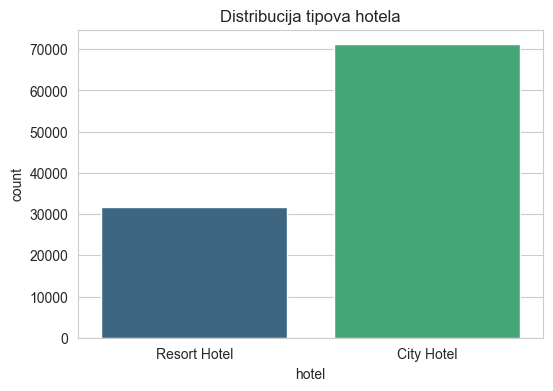

In [31]:
print("Više ljudi odsjeda u hotelima u gradu nego u resortima prema ovom datasetu.\n")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='hotel', palette= 'viridis', hue='hotel', legend=False)
plt.title("Distribucija tipova hotela")
plt.show()

Najveća dolaznost je u kolovozu.



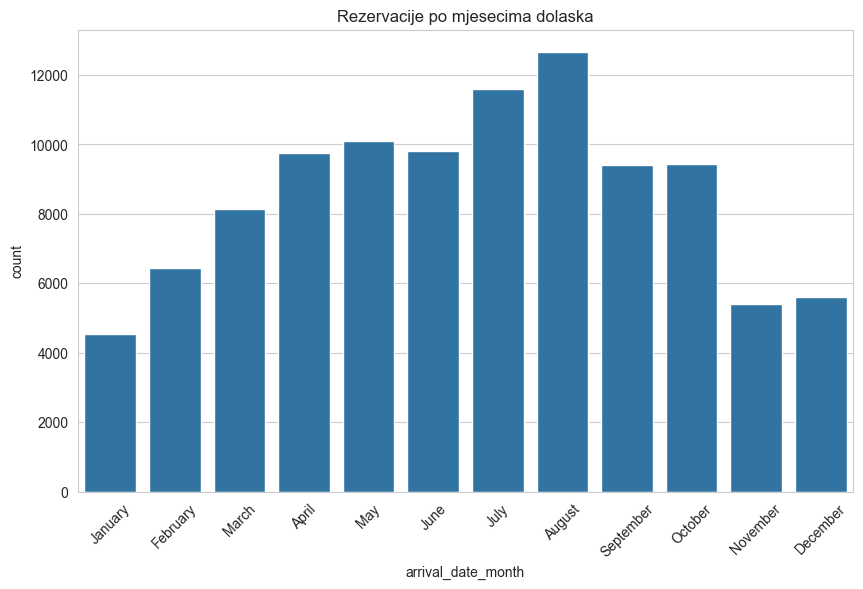

In [32]:
print("Najveća dolaznost je u kolovozu.\n")
order_months = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data=df, x='arrival_date_month', order=order_months)
plt.title("Rezervacije po mjesecima dolaska")
plt.xticks(rotation=45)
plt.show()


Postotak otkazanih rezervacija: 
is_canceled
0    60.96857
1    39.03143
Name: proportion, dtype: float64


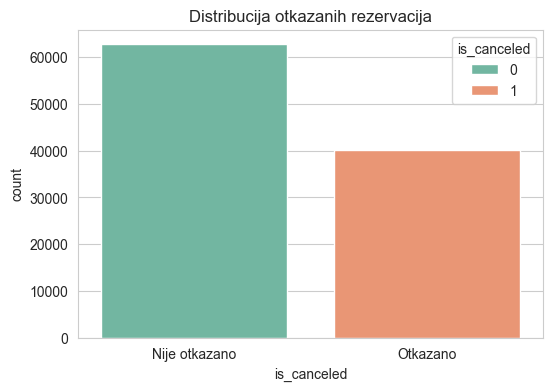

In [33]:
cancel_rates = df['is_canceled'].value_counts(normalize=True) * 100
print(f"\nPostotak otkazanih rezervacija: \n{cancel_rates}")

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_canceled', palette='Set2', hue='is_canceled')
plt.title("Distribucija otkazanih rezervacija")
plt.xticks([0, 1], ['Nije otkazano', 'Otkazano'])
plt.show()

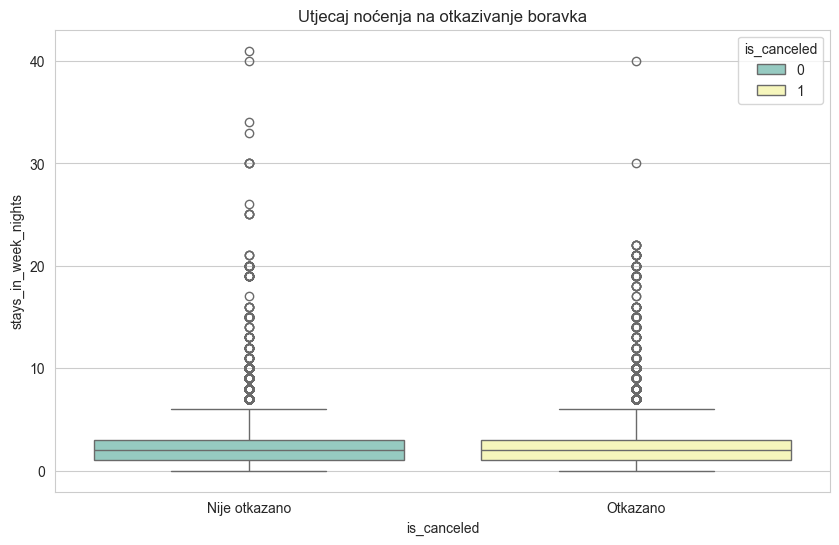

In [34]:
sns.boxplot(data=df, x='is_canceled', y='stays_in_week_nights', palette='Set3', hue='is_canceled')
plt.title("Utjecaj noćenja na otkazivanje boravka")
plt.xticks([0, 1], ['Nije otkazano', 'Otkazano'])
plt.show()

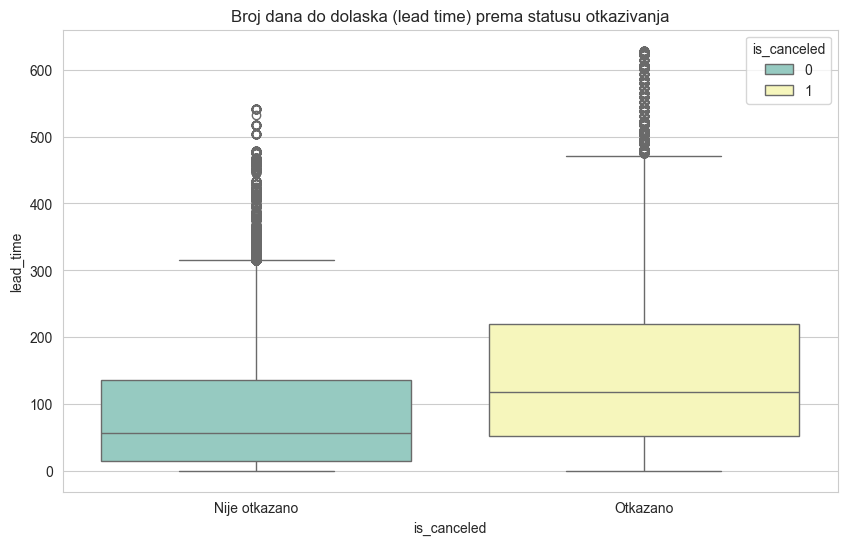

In [35]:
sns.boxplot(data=df1, x='is_canceled', y='lead_time', palette='Set3', hue='is_canceled')
plt.title("Broj dana do dolaska (lead time) prema statusu otkazivanja")
plt.xticks([0, 1], ['Nije otkazano', 'Otkazano'])
plt.show()

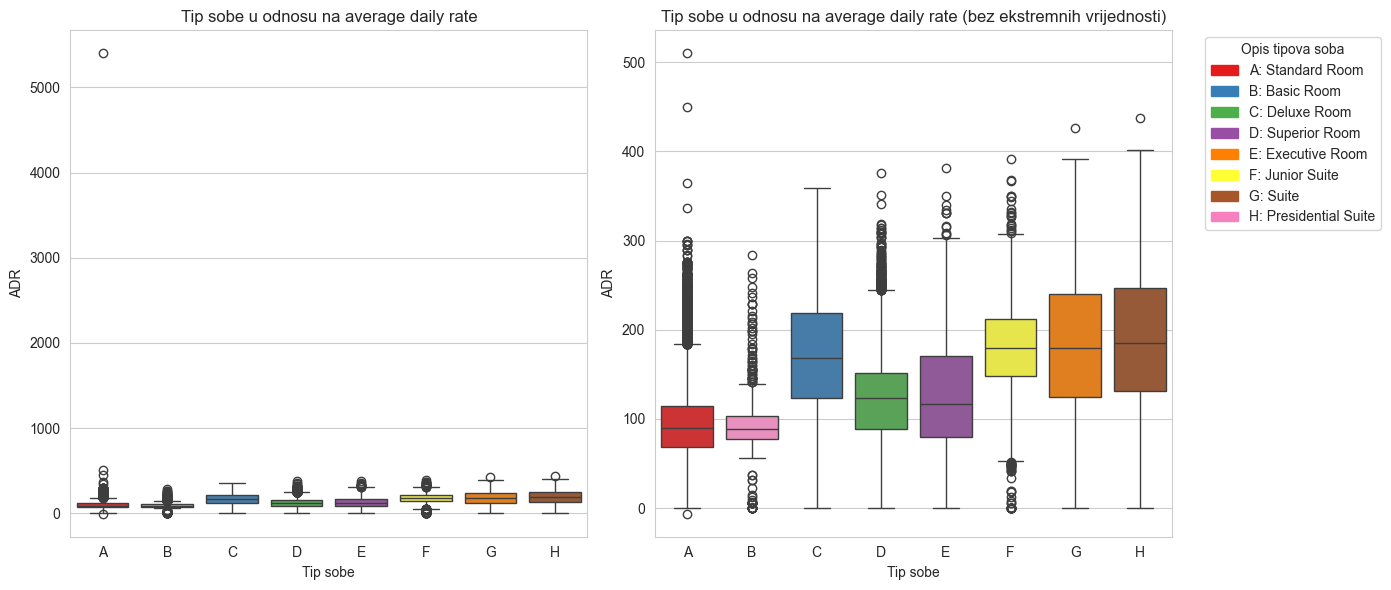

In [36]:
# Mapiranje tipova soba na opisne nazive
tip_sobe_nazivi = {
    'A': 'Standard Room',
    'B': 'Basic Room',
    'C': 'Deluxe Room',
    'D': 'Superior Room',
    'E': 'Executive Room',
    'F': 'Junior Suite',
    'G': 'Suite',
    'H': 'Presidential Suite'
}

# Postavljanje figure
plt.figure(figsize=(14, 6))

order_slova = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# Prvi subplot: Originalni podaci
plt.subplot(1, 2, 1)
sns.boxplot(data=df1, x='reserved_room_type', y='adr', palette='Set1', hue='reserved_room_type', order=order_slova)
plt.title("Tip sobe u odnosu na average daily rate")
plt.xlabel("Tip sobe")
plt.ylabel("ADR")
plt.legend([], [], frameon=False)  # Sakrivanje automatske legende

# Drugi subplot: Filtrirani podaci
df_filtered = df1[(df1['reserved_room_type'] != 'A') | (df1['adr'] < 5000)]
plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered, x='reserved_room_type', y='adr', palette='Set1', hue='reserved_room_type', order=order_slova)
plt.title("Tip sobe u odnosu na average daily rate (bez ekstremnih vrijednosti)")
plt.xlabel("Tip sobe")
plt.ylabel("ADR")
plt.legend([], [], frameon=False)  # Sakrivanje automatske legende

# Dodavanje zajedničke legende za obje grafske slike
import matplotlib.patches as mpatches

legend_handles = [
    mpatches.Patch(color=sns.color_palette('Set1')[i], label=f"{key}: {value}")
    for i, (key, value) in enumerate(tip_sobe_nazivi.items())
]

plt.legend(handles=legend_handles, title="Opis tipova soba", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

# Prikaz grafa
plt.tight_layout()
plt.show()


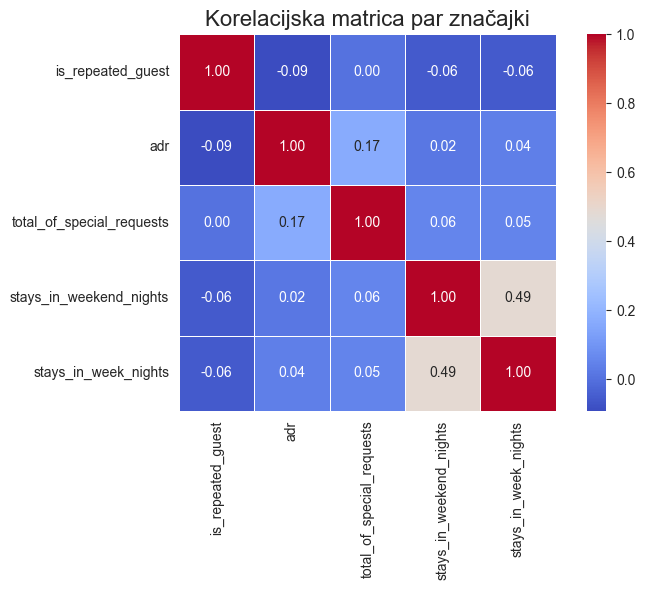

In [37]:
#korelacijska matrica pa rznačajki
numerical_columns = df1[['is_repeated_guest', 'adr', 'total_of_special_requests', 'stays_in_weekend_nights', 'stays_in_week_nights']]
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    linewidths=0.5
)

plt.title("Korelacijska matrica par značajki", fontsize=16)
plt.tight_layout()
plt.show()


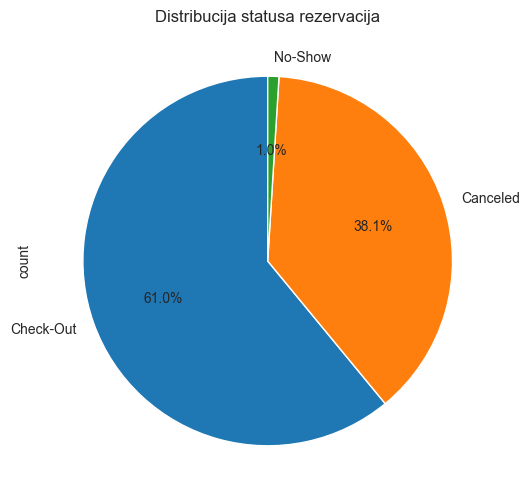

In [38]:
# pie chart
reservation_status_counts = df['reservation_status'].value_counts()
reservation_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribucija statusa rezervacija")
plt.show()


In [39]:

import ipywidgets as widgets # type: ignore
from IPython.display import display

year_widget = widgets.Dropdown(
    options=[2015, 2016, 2017],
    value=2016,  # defaultna vrijednost
    description='Godina: ',
)

def plot_reservations(year):
    filtered_df = df1[df1['arrival_date_year'] == year]
    reservation_counts_by_month = filtered_df['arrival_date_month'].value_counts().sort_index()

    reservation_counts_by_month = reservation_counts_by_month.reindex(order_months, fill_value=0)

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=reservation_counts_by_month.index, y=reservation_counts_by_month.values, color='blue', marker='o')
    plt.title(f"Broj rezervacija po mjesecima za godinu {year}")
    plt.xlabel("Mjesec")
    plt.ylabel("Broj rezervacija")
    plt.xticks(rotation=45)
    plt.show()

widgets.interactive(plot_reservations, year=year_widget)


interactive(children=(Dropdown(description='Godina: ', index=1, options=(2015, 2016, 2017), value=2016), Outpu…

/var/folders/2_/j1l_ycld7kz95x1plfj0s5yw0000gn/T/ipykernel_1006/3080041026.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='arrival_date_month', y='length_of_stay', data=df1, palette='Set3')


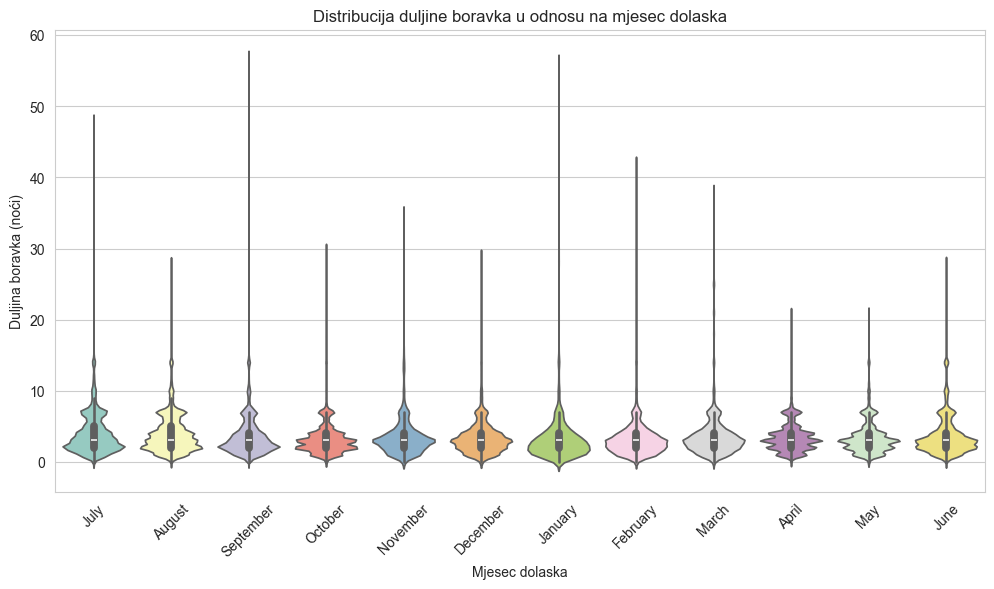

In [40]:
df1['length_of_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']

plt.figure(figsize=(12, 6))
sns.violinplot(x='arrival_date_month', y='length_of_stay', data=df1, palette='Set3')
plt.title("Distribucija duljine boravka u odnosu na mjesec dolaska")
plt.xlabel("Mjesec dolaska")
plt.ylabel("Duljina boravka (noći)")
plt.xticks(rotation=45)
plt.show()

#dulji ostanci kroz zimske mjesece, kraći kroz ljeto
#nez jel ovo previse varijabli za violin plot pa makni ako je nepotrebno

In [41]:
value_counts = df1['country'].value_counts()
print(value_counts)

country
PRT    37584
GBR    10888
FRA     9810
ESP     7848
DEU     6998
       ...  
BHS        1
UMI        1
NPL        1
MWI        1
BFA        1
Name: count, Length: 174, dtype: int64


Iz ovog prikaza možemo zaključiti da su Portugal, Velika Britanija, Francuska, Španija i Nemačka zemlje koje su najposećenije. U nastavku ćemo ih vizualizovati na karti.

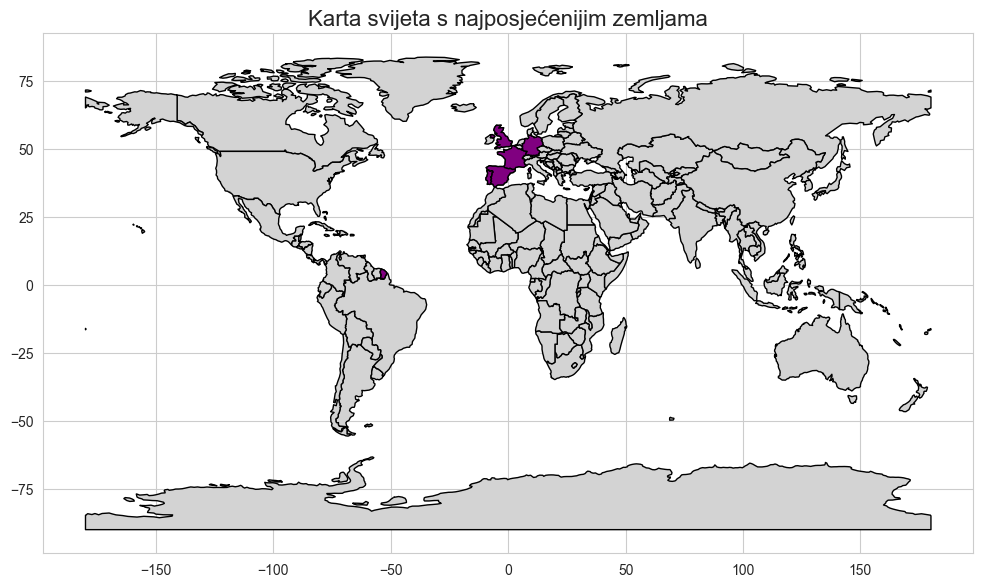

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pycountry

file_path_list = "data2/ne_110m_admin_0_countries.shp"

# Učitaj geopandas dataset sa granicama zemalja
world = gpd.read_file(file_path_list)

# Tvoje zemlje i broj poseta
top_countries = {
    "PRT": 37584,
    "GBR": 10888,
    "FRA": 9810,
    "ESP": 7848,
    "DEU": 6998
}

# Dodaj imena zemalja za svaki kod
top_countries_full = {
    pycountry.countries.get(alpha_3=code).name: visits for code, visits in top_countries.items()
}

# Filtriraj podatke za najposećenije zemlje
world['is_top'] = world['NAME'].apply(lambda x: x in top_countries_full.keys())
top_visited = world[world['is_top']]

# Kreiraj kartu
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color="lightgray", edgecolor="black")
top_visited.plot(ax=ax, color="purple", edgecolor="black")

# Dodaj naslov
plt.title("Karta svijeta s najposjećenijim zemljama", fontsize=16)
plt.show()



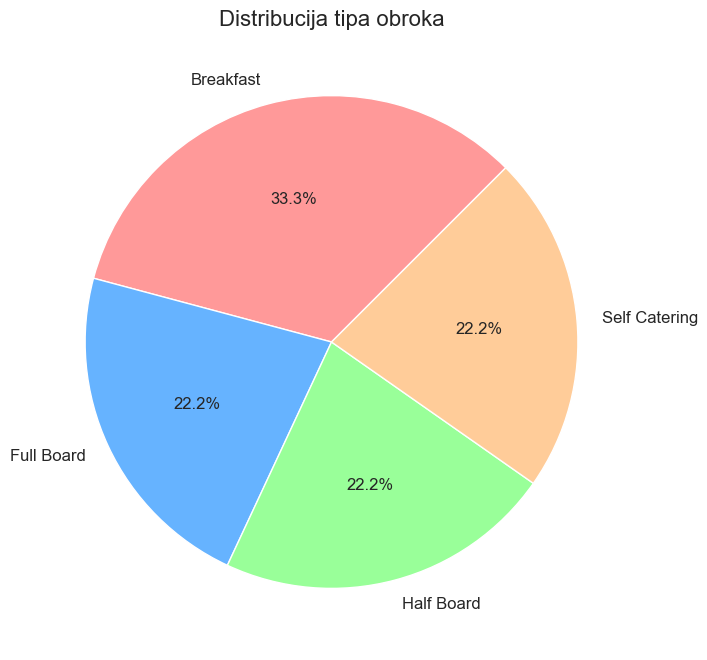

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Pretpostavimo da je ovo tvoj DataFrame
data = {'meal': ['BB', 'FB', 'HB', 'SC', 'Undefined', 'BB', 'HB', 'SC', 'FB', 'BB']}
df = pd.DataFrame(data)

# Mapa za prevod šifri u pune nazive (bez "Undefined")
meal_translation = {
    "BB": "Breakfast",
    "FB": "Full Board",
    "HB": "Half Board",
    "SC": "Self Catering"
}

# Filtriraj Undefined i prevedi šifre u pune nazive direktno u brojanju
df_filtered = df[df['meal'] != 'Undefined']
meal_counts = df_filtered['meal'].map(meal_translation).value_counts()

# Boje za grafikon
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Kreiraj pie grafikon
plt.figure(figsize=(8, 8))
meal_counts.plot(
    kind='pie', 
    autopct='%1.1f%%',  # Prikaz procenata na osnovu učestalosti
    startangle=45, 
    colors=custom_colors, 
    textprops={'fontsize': 12}
)

# Dodaj naslov
plt.title("Distribucija tipa obroka", fontsize=16)

# Prikaži grafikon
plt.ylabel('')  # Ukloni default labelu
plt.show()


/var/folders/2_/j1l_ycld7kz95x1plfj0s5yw0000gn/T/ipykernel_1006/3457560629.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cekali_prosjek, x='hotel', y='days_in_waiting_list', palette='coolwarm')


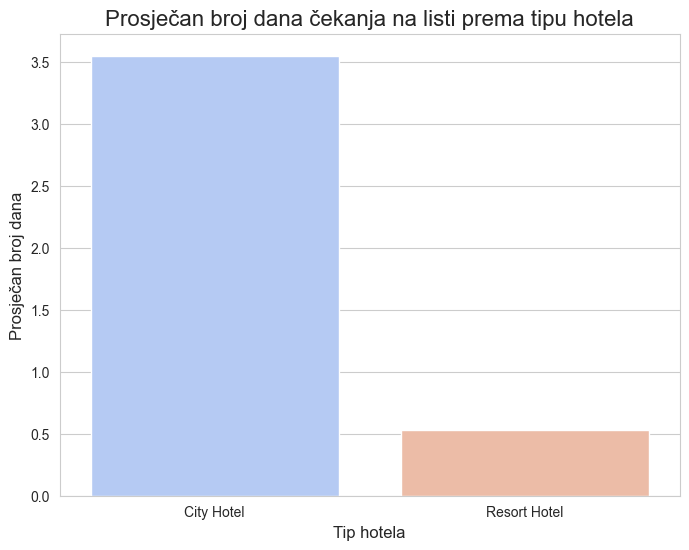

In [44]:
# Prosječan broj dana čekanja na listi prema tipu hotela
cekali_prosjek = df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=cekali_prosjek, x='hotel', y='days_in_waiting_list', palette='coolwarm')
plt.title("Prosječan broj dana čekanja na listi prema tipu hotela", fontsize=16)
plt.xlabel("Tip hotela", fontsize=12)
plt.ylabel("Prosječan broj dana", fontsize=12)
plt.show()


/var/folders/2_/j1l_ycld7kz95x1plfj0s5yw0000gn/T/ipykernel_1006/1723422189.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cijene_soba, x='opis_tip_sobe', y='adr', palette='viridis')


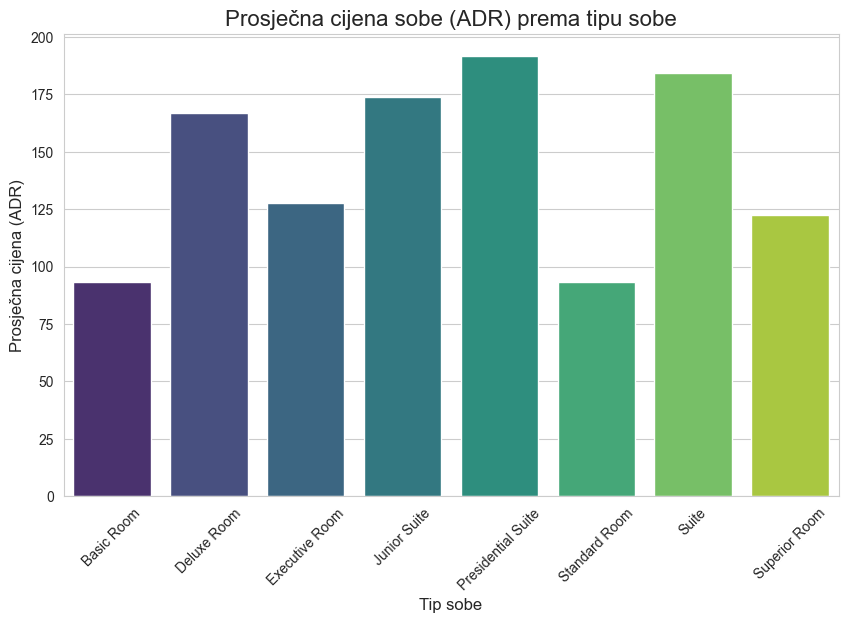

In [45]:

# Dodavanje opisnih naziva prethodno u projektu
df1['opis_tip_sobe'] = df1['reserved_room_type'].map(tip_sobe_nazivi)

# Prosječna cijena sobe (ADR) prema tipu sobe
cijene_soba = df1.groupby('opis_tip_sobe')['adr'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=cijene_soba, x='opis_tip_sobe', y='adr', palette='viridis')
plt.title("Prosječna cijena sobe (ADR) prema tipu sobe", fontsize=16)
plt.xlabel("Tip sobe", fontsize=12)
plt.ylabel("Prosječna cijena (ADR)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotacija naziva soba za bolju čitljivost
plt.show()


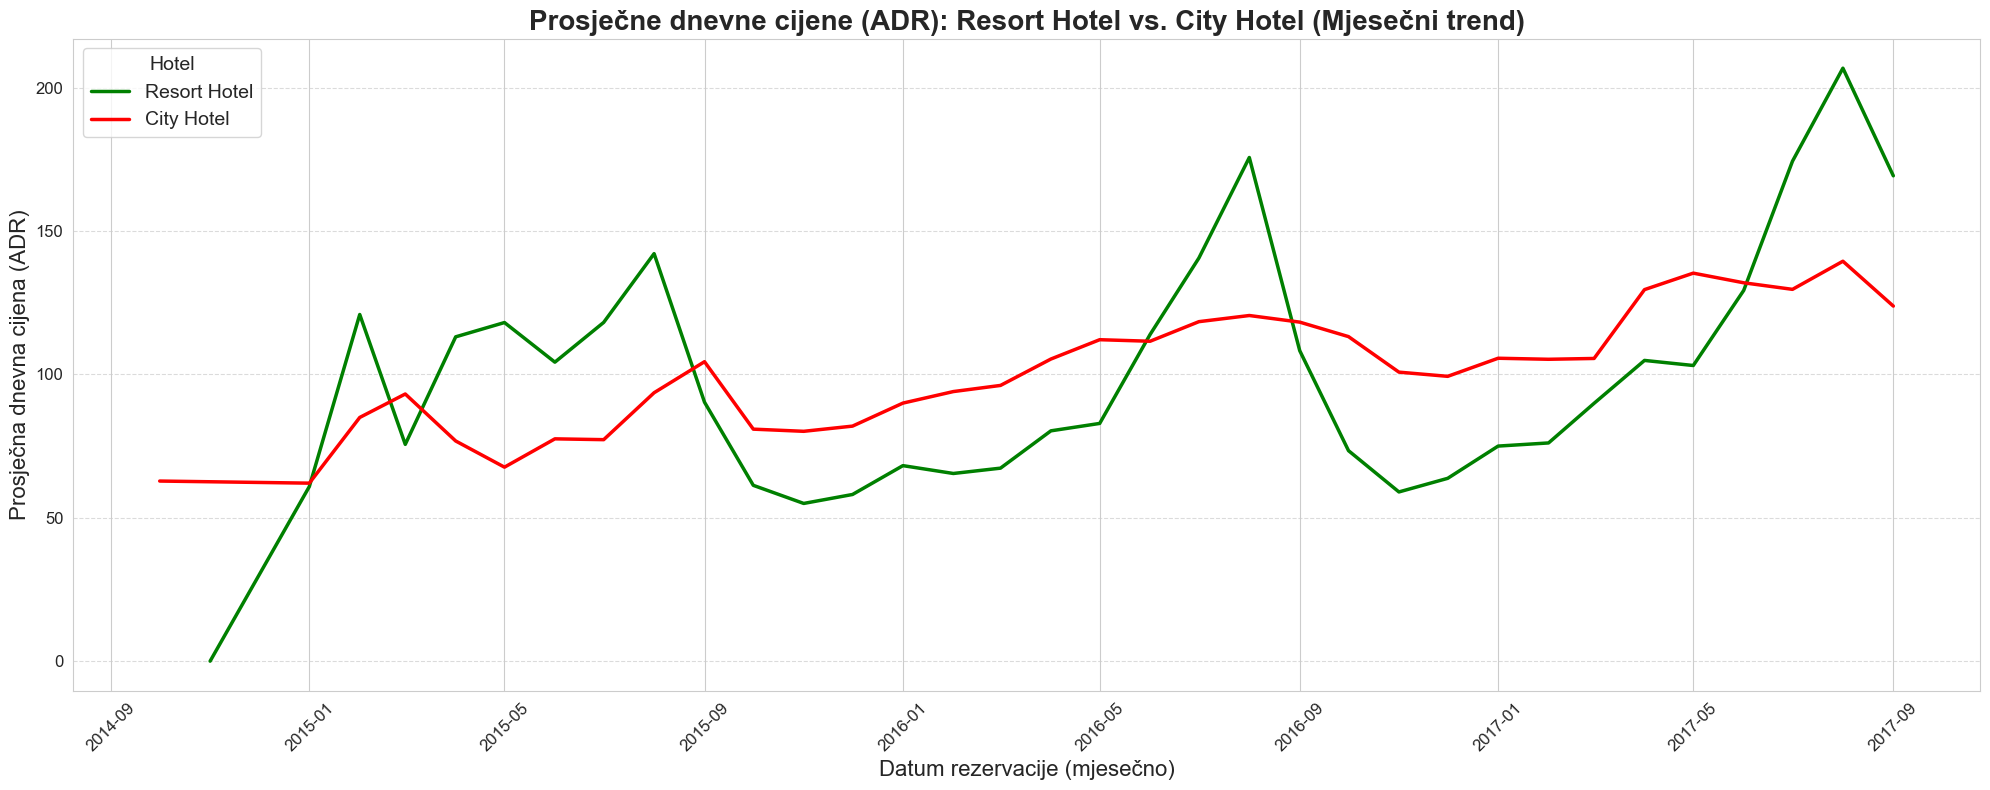

In [46]:
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], errors='coerce')

# Grupiranje po mjesecima za bolju preglednost
resort_hotel_monthly = df1[df1['hotel'] == 'Resort Hotel'].groupby(df1['reservation_status_date'].dt.to_period('M'))[['adr']].mean()
city_hotel_monthly = df1[df1['hotel'] == 'City Hotel'].groupby(df1['reservation_status_date'].dt.to_period('M'))[['adr']].mean()

# Pretvaranje perioda u datume za os x
resort_hotel_monthly.index = resort_hotel_monthly.index.to_timestamp()
city_hotel_monthly.index = city_hotel_monthly.index.to_timestamp()

# Postavljanje grafa
plt.figure(figsize=(20, 8))
plt.plot(resort_hotel_monthly.index, resort_hotel_monthly['adr'], label='Resort Hotel', color='green', linewidth=2.5)
plt.plot(city_hotel_monthly.index, city_hotel_monthly['adr'], label='City Hotel', color='red', linewidth=2.5)

# Dodavanje detalja za bolji izgled
plt.xlabel('Datum rezervacije (mjesečno)', fontsize=16)
plt.ylabel('Prosječna dnevna cijena (ADR)', fontsize=16)
plt.title('Prosječne dnevne cijene (ADR): Resort Hotel vs. City Hotel (Mjesečni trend)', fontsize=20, fontweight='bold')
plt.legend(loc='best', fontsize=14, frameon=True, title='Hotel', title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Dodavanje linija mreže
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Prikaz grafa
plt.tight_layout()
plt.show()


Iz prikazanog grafa možemo zaključiti sljedeće:


### **Sezonalnost cijena:**  

Prosječna dnevna cijena (ADR) za Resort Hotel pokazuje značajne sezonske fluktuacije. Cijene dosežu vrhunac tijekom ljetnih mjeseci (posebno sredinom 2016. godine), što sugerira povećanu potražnju za resortima u sezoni odmora.
City Hotel ima stabilniji trend bez velikih oscilacija, što ukazuje na konstantniju potražnju tijekom cijele godine, s manjim varijacijama.


### **Razlika u prosječnim cijenama:**  
U većini vremenskog razdoblja, Resort Hotel ima više prosječne dnevne cijene od City Hotel-a, što može biti posljedica luksuznijih sadržaja ili lokacija koje privlače turiste tijekom odmora.
City Hotel zadržava niže i stabilnije cijene, što ga čini privlačnijim za poslovne putnike ili goste koji putuju tijekom cijele godine.

### **Pad cijena:**  
Primjećuje se značajan pad prosječnih cijena za oba tipa hotela nakon vrhunaca, posebno prema kraju analiziranog razdoblja, što može biti posljedica pada potražnje ili promjena u strategijama cijena.

Ovaj graf je važan jer:
Pomaže u strategijama određivanja cijena:
Vlasnici hotela mogu koristiti ove informacije kako bi optimizirali cijene tijekom različitih sezona. Na primjer, povećanje cijena u ljetnim mjesecima za Resort Hotel ili uvođenje posebnih ponuda tijekom manje potražnje.
Analiza tržišnih trendova:
Graf otkriva različite trendove u ponašanju gostiju koji biraju Resort Hotel u odnosu na City Hotel, omogućujući hotelima da prilagode svoje marketinške i operativne strategije.
Sezonsko planiranje:
Sezonalnost u potražnji pomaže hotelima da unaprijed planiraju resurse, osoblja, održavanja ili posebnih ponuda, kako bi maksimizirali profit i zadovoljstvo gostiju.

Analiza mjesečnih stopa otkazivanja po hotelu

<module 'matplotlib.pyplot' from '/Users/teatisaj/uzop_projekt_2/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

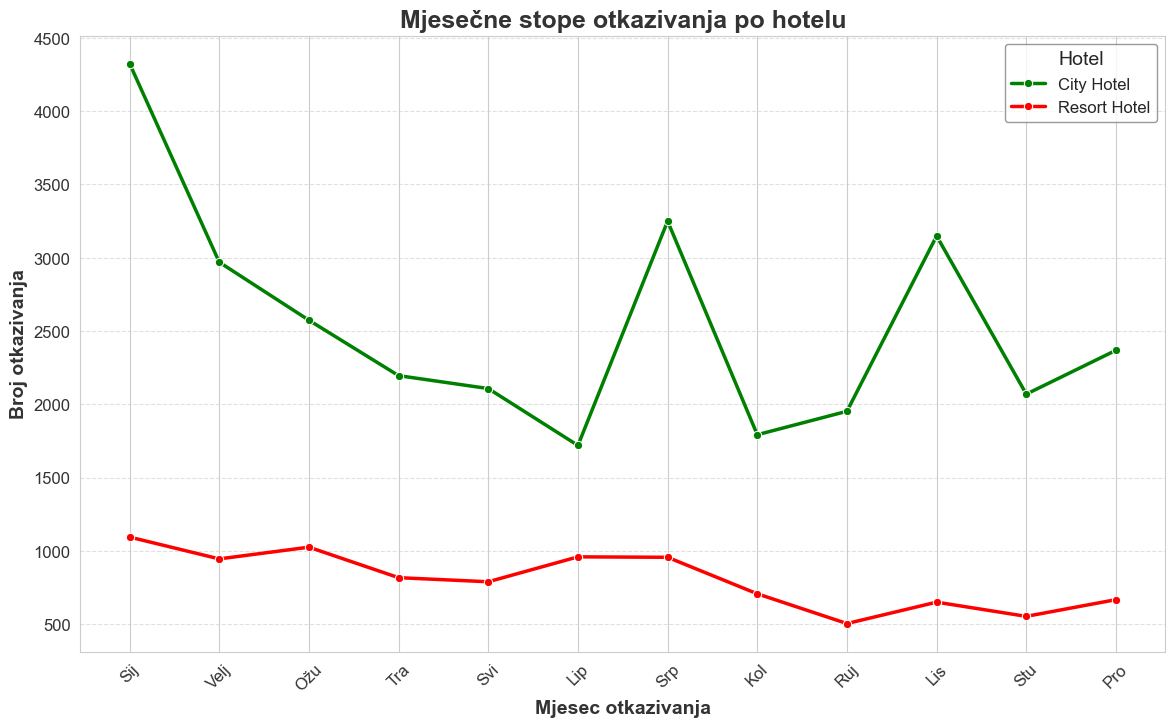

In [47]:
# Pretvaranje stupca 'reservation_status_date' u datetime format
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], errors='coerce')

# Dodavanje stupca s mjesecom otkazivanja
df1['reservation_status_month'] = df1['reservation_status_date'].dt.month

# Grupiranje za analizu mjesečnih stopa otkazivanja
mjesečna_otkazivanja = df1.groupby(['hotel', 'reservation_status_month'])['is_canceled'].sum().reset_index()

# Postavljanje grafa
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")  # Dodavanje stila
sns.lineplot(
    x='reservation_status_month', 
    y='is_canceled', 
    hue='hotel', 
    data=mjesečna_otkazivanja, 
    marker='o', 
    palette=['green', 'red'],  # Zelena za Resort Hotel, crvena za City Hotel
    linewidth=2.5
)

# Uljepšavanje grafa
plt.title('Mjesečne stope otkazivanja po hotelu', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Mjesec otkazivanja', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Broj otkazivanja', fontsize=14, fontweight='bold', color='#333333')
plt.xticks(
    ticks=range(1, 13), 
    labels=['Sij', 'Velj', 'Ožu', 'Tra', 'Svi', 'Lip', 'Srp', 'Kol', 'Ruj', 'Lis', 'Stu', 'Pro'], 
    rotation=45, fontsize=12, color='#333333'
)
plt.yticks(fontsize=12, color='#333333')
plt.legend(title='Hotel', fontsize=12, title_fontsize=14, loc='upper right', frameon=True, edgecolor='gray')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Prikaz grafa
plt


Graf mjesečnih stopa otkazivanja po hotelima važan je jer pruža ključne uvide u sezonalnost i obrasce otkazivanja rezervacija za Resort Hotel i City Hotel. Vizualizacijom ovih podataka, hoteli mogu:

Identificirati mjesece s visokim stopama otkazivanja:
Razumijevanje kada se najviše otkazuje pomaže u optimizaciji poslovanja, poput prilagodbe marketinških kampanja ili prilagodbe politika otkazivanja.
Razlikovati sezonalne obrasce:
Resort Hotel obično ima izraženiju sezonalnost zbog turista i odmora, dok je City Hotel stabilniji, budući da češće služi poslovnim putnicima.
Strategije za smanjenje otkazivanja:
Na temelju ovog grafa, hoteli mogu ponuditi bolje uvjete rezervacija ili popuste u razdobljima visokih otkazivanja kako bi zadržali goste.

### **Važnost projekta**  
Ova analiza može pomoći upravama hotela u donošenju informisanih odluka o strategijama određivanja cijena, upravljanja sobama i optimizaciji rezervacija. Nadalje, pruža uvid u sezonske trendove koji su ključni za planiranje kapaciteta i marketinških kampanja. Na osnovu ovih podataka, hoteli mogu bolje razumjeti potrebe i ponašanje svojih gostiju te tako poboljšati profitabilnost i zadovoljstvo gostiju.